In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import seaborn as sns

import dataframe_image as dfi

%matplotlib inline

In [2]:
thermometry = pd.read_csv("thermometry.csv")

In [3]:
df = thermometry.copy()

In [4]:
df.head()

,body.temp,gender,heart.rate
0,96.3,male,70
1,96.7,male,71
2,96.9,male,74
3,97.0,male,80
4,97.1,male,73


In [5]:
df.gender.value_counts()

male      65
female    65
Name: gender, dtype: int64

In [6]:
df.columns

Index(['body.temp', 'gender', 'heart.rate'], dtype='object')

In [7]:
df.rename(columns={"body.temp": "body_temp", "heart.rate": "heart_rate"}, inplace=True)

In [8]:
df[["body_temp", "gender"]].head()

,body_temp,gender
0,96.3,male
1,96.7,male
2,96.9,male
3,97.0,male
4,97.1,male


In [9]:
df.isnull().any()

body_temp     False
gender        False
heart_rate    False
dtype: bool

In [10]:
df["body_temp"].corr(df["heart_rate"])

0.25365640272076423

In [11]:
df.groupby(["gender"])["body_temp"].aggregate(["mean", "std", "median"])

,mean,std,median
gender,,,
female,98.393846,0.743488,98.4
male,98.104615,0.698756,98.1


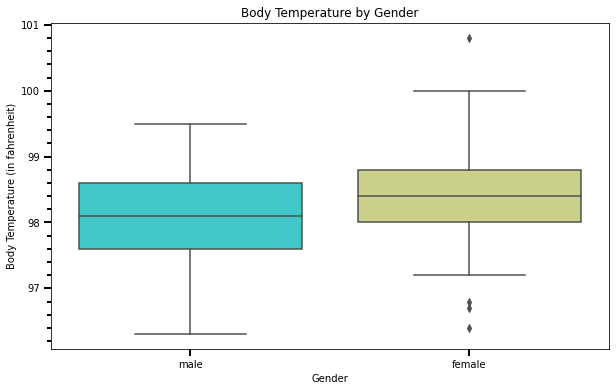

In [12]:
plt.figure(figsize=(10,6))

g = sns.boxplot(x="gender", y="body_temp", data=df, palette="rainbow")

g.set_xlabel("Gender")
g.set_ylabel("Body Temperature (in fahrenheit)")
g.set_title("Body Temperature by Gender")

g.yaxis.set_minor_locator(AutoMinorLocator())

g.tick_params(which="both", width=2)
g.tick_params(which="major", length=7)
g.tick_params(which="minor", length=4)

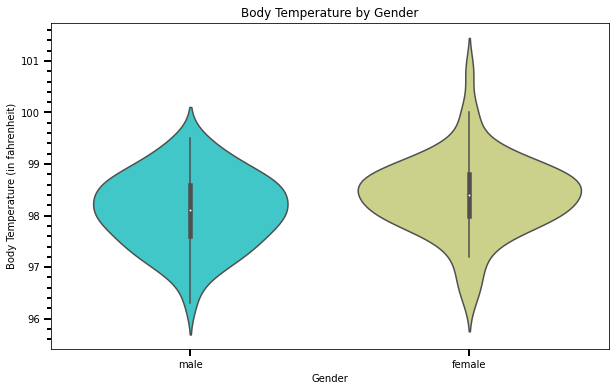

In [13]:
plt.figure(figsize=(10,6))

g = sns.violinplot(x="gender", y="body_temp", data=df, palette="rainbow")

g.set_xlabel("Gender")
g.set_ylabel("Body Temperature (in fahrenheit)")
g.set_title("Body Temperature by Gender")

g.yaxis.set_minor_locator(AutoMinorLocator())

g.tick_params(which="both", width=2)
g.tick_params(which="major", length=7)
g.tick_params(which="minor", length=4)

In [14]:
df.groupby("gender")["body_temp"].aggregate(["mean","std","median"]).T

gender,female,male
mean,98.393846,98.104615
std,0.743488,0.698756
median,98.400000,98.100000


In [15]:
from scipy import stats

In [16]:
male = df["gender"] == "male"
female = df["gender"] == "female"

In [17]:
stats.shapiro(df[male].body_temp)

ShapiroResult(statistic=0.9894071817398071, pvalue=0.8545167446136475)

In [18]:
stats.shapiro(df[female].body_temp)

ShapiroResult(statistic=0.9679745435714722, pvalue=0.09016574919223785)

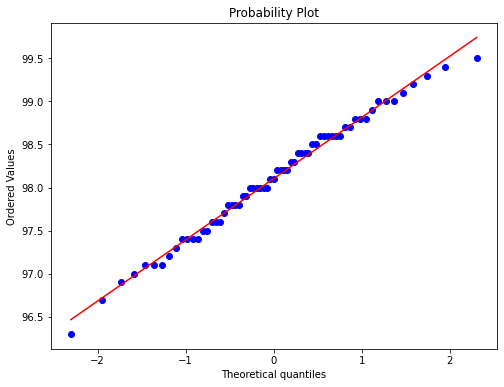

In [19]:
plt.figure(figsize=(8,6))

ax = stats.probplot(df[male].body_temp, dist="norm", plot=plt)

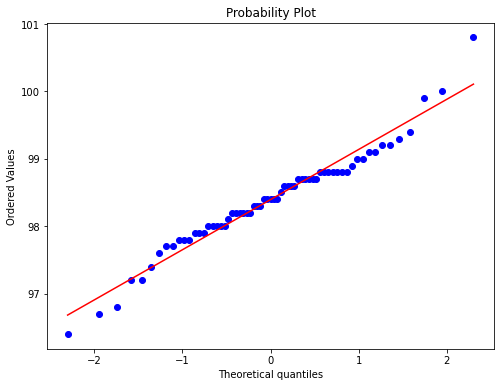

In [20]:
plt.figure(figsize=(8,6))

ax = stats.probplot(df[female].body_temp, dist="norm", plot=plt)

In [21]:
stats.levene(df[male].body_temp, df[female].body_temp, center="mean")

LeveneResult(statistic=0.061118126945116, pvalue=0.8051334389753846)

In [22]:
import researchpy as rp

In [23]:
results_t = rp.ttest(group1 = df[male].body_temp, group1_name="Male",
        group2 = df[female].body_temp, group2_name="Female")

In [24]:
results_t

(   Variable      N       Mean        SD        SE  95% Conf.   Interval
 0      Male   65.0  98.104615  0.698756  0.086670  97.931472  98.277759
 1    Female   65.0  98.393846  0.743488  0.092218  98.209619  98.578073
 2  combined  130.0  98.249231  0.733183  0.064304  98.122003  98.376459,
               Independent t-test   results
 0  Difference (Male - Female) =    -0.2892
 1          Degrees of freedom =   128.0000
 2                           t =    -2.2854
 3       Two side test p value =     0.0239
 4      Difference < 0 p value =     0.0120
 5      Difference > 0 p value =     0.9880
 6                   Cohen's d =    -0.4009
 7                   Hedge's g =    -0.3985
 8               Glass's delta =    -0.4139
 9                 Pearson's r =     0.1980)

In [25]:
test_stat, p_value = stats.ttest_ind(df[male].body_temp, 
                                      df[female].body_temp)

print("Test statistic=%.3f, p=%.3f" % (test_stat, p_value))

Test statistic=-2.285, p=0.024


In [26]:
plants = pd.read_csv("PlantGrowth.csv")

In [27]:
df = plants.copy()

In [28]:
df.head()

,Unnamed: 0,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl


In [29]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [30]:
df.head()

,weight,group
0,4.17,ctrl
1,5.58,ctrl
2,5.18,ctrl
3,6.11,ctrl
4,4.50,ctrl


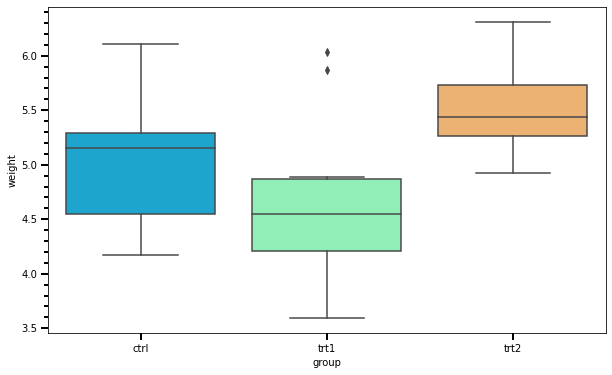

In [31]:
plt.figure(figsize=(10,6))

g = sns.boxplot(x="group", y="weight", data=df, palette="rainbow")

g.yaxis.set_minor_locator(AutoMinorLocator())

g.tick_params(which="both", width=2)
g.tick_params(which="major", length=7)
g.tick_params(which="minor", length=4)

In [32]:
df.groupby("group")["weight"].aggregate(["mean","std","median"]).T

group,ctrl,trt1,trt2
mean,5.032000,4.661000,5.526000
std,0.583091,0.793676,0.442573
median,5.155000,4.550000,5.435000


In [33]:
control = df["group"] == "ctrl"
treatment_1 = df["group"] == "trt1"
treatment_2 = df["group"] == "trt2"

In [34]:
stats.levene(df[control].weight, df[treatment_1].weight, df[treatment_2].weight)

LeveneResult(statistic=1.1191856948703909, pvalue=0.3412266241254737)

In [35]:
stats.shapiro(df[control].weight)

ShapiroResult(statistic=0.9566815495491028, pvalue=0.7474744915962219)

In [36]:
stats.shapiro(df[treatment_1].weight)

ShapiroResult(statistic=0.9304108619689941, pvalue=0.451945960521698)

In [37]:
stats.shapiro(df[treatment_2].weight)

ShapiroResult(statistic=0.9410051107406616, pvalue=0.5642509460449219)

In [38]:
import pingouin as pg

In [39]:
aov = pg.anova(data=df, dv='weight', between='group', detailed=True)

In [40]:
aov

,Source,SS,DF,MS,F,p-unc,np2
0,group,3.76634,2,1.883170,4.846088,0.01591,0.264148
1,Within,10.49209,27,0.388596,NaN,NaN,NaN


In [41]:
test_stat, p_value = stats.f_oneway(df[control].weight, df[treatment_1].weight, df[treatment_2].weight)

print("Test statistic=%.3f, p=%.3f" % (test_stat, p_value))

Test statistic=4.846, p=0.016


In [42]:
pt = pg.pairwise_tukey(dv='weight', between='group', data=df, effsize="cohen")

In [43]:
pt

,A,B,mean(A),mean(B),diff,se,T,p-tukey,cohen
0,ctrl,trt1,5.032,4.661,0.371,0.278782,1.330791,0.392139,0.595148
1,ctrl,trt2,5.032,5.526,-0.494,0.278782,-1.771996,0.198036,-0.792461
2,trt1,trt2,4.661,5.526,-0.865,0.278782,-3.102787,0.011993,-1.387609


In [44]:
p_bonf = .05 / len(pt)
p_bonf

0.016666666666666666

In [45]:
gss_wordsum_ses = pd.read_csv("reading_ses_data.csv")

In [46]:
df_gss = gss_wordsum_ses.copy()

In [47]:
df_gss.head()

,Unnamed: 0,wordsum,class
0,1,6,MIDDLE
1,2,9,WORKING
2,3,6,WORKING
3,4,5,WORKING
4,5,6,WORKING


In [51]:
df_gss.drop("Unnamed: 0", axis=1, inplace=True)

In [52]:
df_gss.head()

,wordsum,class
0,6,MIDDLE
1,9,WORKING
2,6,WORKING
3,5,WORKING
4,6,WORKING


In [53]:
df_gss.isnull().any()

wordsum    False
class      False
dtype: bool

In [54]:
df_gss["class"].value_counts()

WORKING    407
MIDDLE     331
LOWER       41
UPPER       16
Name: class, dtype: int64

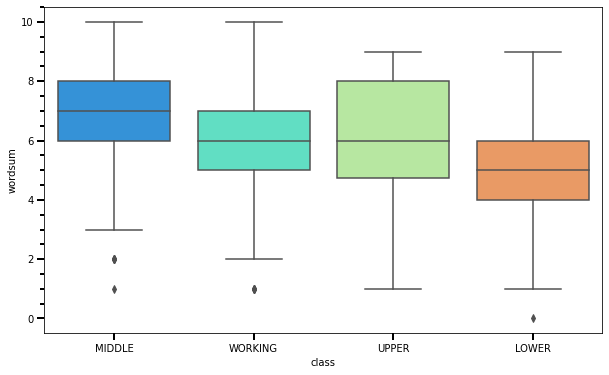

In [55]:
plt.figure(figsize=(10,6))

g = sns.boxplot(x="class", y="wordsum", data=df_gss, palette="rainbow")

g.yaxis.set_minor_locator(AutoMinorLocator())

g.tick_params(which="both", width=2)
g.tick_params(which="major", length=7)
g.tick_params(which="minor", length=4)

In [56]:
df_gss["class"] = df_gss["class"].astype("category")
df_gss["class"].cat.reorder_categories(["LOWER", "WORKING", "MIDDLE", "UPPER"])

0       MIDDLE
1      WORKING
2      WORKING
3      WORKING
4      WORKING
        ...   
790    WORKING
791    WORKING
792    WORKING
793    WORKING
794     MIDDLE
Name: class, Length: 795, dtype: category
Categories (4, object): ['LOWER', 'WORKING', 'MIDDLE', 'UPPER']

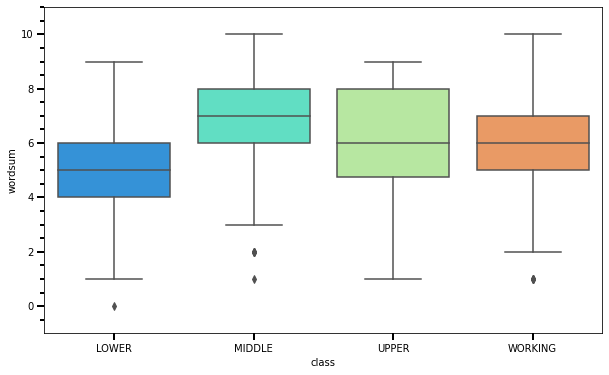

In [60]:
plt.figure(figsize=(10,6))

g = sns.boxplot(x="class", y="wordsum", data=df_gss, palette="rainbow")

g.set_ylim(-1, 11)
g.yaxis.set_minor_locator(AutoMinorLocator())

g.tick_params(which="both", width=2)
g.tick_params(which="major", length=7)
g.tick_params(which="minor", length=4)

In [63]:
df_gss.groupby("class")["wordsum"].aggregate(["mean", "std", "median"]).T

class,LOWER,MIDDLE,UPPER,WORKING
mean,5.073171,6.761329,6.187500,5.749386
std,2.240427,1.886270,2.344319,1.865184
median,5.000000,7.000000,6.000000,6.000000
